<a href="https://colab.research.google.com/github/jedrexd/WTUM_11_2022/blob/main/Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.linear_model import BayesianRidge, ARDRegression, LinearRegression
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV, train_test_split

In [2]:
!git clone https://github.com/jedrexd/WTUM_11_2022

Cloning into 'WTUM_11_2022'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 86 (delta 48), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (86/86), done.


In [52]:
df = pd.read_csv("/content/WTUM_11_2022/train.csv", header=0)
df = df.iloc[:,1:]
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [55]:
#sprawdzanie czy sa outliery (przejrzec kazda kolumne)

#kolumny 40-60
print(df['CentralAir'].unique())   #brak
print(df['Electrical'].unique())   #brak
print(df['1stFlrSF'].unique())     #zrobic wykres
print(df['2ndFlrSF'].unique())     #zrobic wykres
print(df['LowQualFinSF'].unique()) #brak
print(df['GrLivArea'].unique())    #zrobic wykres
print(df['BsmtFullBath'].unique()) #brak
print(df['BsmtHalfBath'].unique()) #brak
print(df['FullBath'].unique())     #brak
print(df['HalfBath'].unique())     #brak
print(df['BedroomAbvGr'].unique()) #brak
print(df['KitchenAbvGr'].unique()) #brak
print(df['KitchenQual'].unique())  #brak
print(df['TotRmsAbvGrd'].unique()) #brak
print(df['Functional'].unique())   #brak
print(df['Fireplaces'].unique())   #brak
print(df['FireplaceQu'].unique())  #brak
print(df['GarageType'].unique())   #brak
print(df['GarageYrBlt'].unique())  #zrobic wykres
print(df['GarageFinish'].unique()) #brak

['Y' 'N']
['SBrkr' 'FuseF' 'FuseA' 'FuseP' 'Mix' nan]
[ 856 1262  920  961 1145  796 1694 1107 1022 1077 1040 1182  912 1494
 1253  854 1004 1296 1114 1339 1158 1108 1795 1060 1600  900 1704  520
  649 1228 1234 1700 1561 1132 1097 1297 1057 1152 1324 1328  884  938
 1150 1752 1518 1656  736  955  794  816 1842 1360 1425  983  860 1426
  780  581 1370  902 1143 2207 1479  747 1304 2223  845  885 1086  840
  526  952 1072 1768  682 1337 1563 1065  804 1301  684  612 1013  990
 1235  964 1260  905  680 1588  960  835 1225 1610  977 1535 1226 1053
 1047  789  997 1844 1216  774 1282 2259 1436  729 1092 1125 1699  728
  988  772 1080 1199 1586  958  660 1327 1721 1682 1214 1959  928  864
 1734  910 1501 1728  970  875  896  969 1710 1252 1200  572  991 1392
 1232 1572 1541  882 1149  808 1867 1707 1064 1362 1651 2158 1164 2234
  968  769  901 1340  936 1217 1224 1593 1549  725 1431  855 1726  929
 1713 1121 1279  865  848  720 1442 1696 1100 1180 1212  932  689 1236
  810 1137 1248 1498 10

Text(0, 0.5, 'df[1stFlrSF][i]')

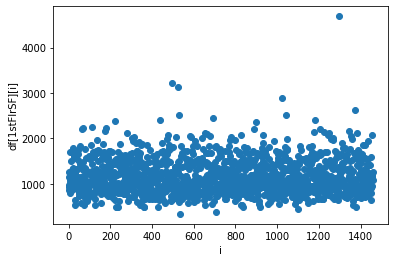

In [58]:
# '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt'

plt.scatter(range(0,len(df['1stFlrSF'])), df['1stFlrSF'])
plt.xlabel('i')
plt.ylabel('df[1stFlrSF][i]')

Text(0, 0.5, 'df[2ndFlrSF][i]')

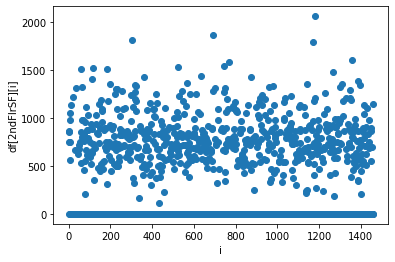

In [59]:
plt.scatter(range(0,len(df['2ndFlrSF'])), df['2ndFlrSF'])
plt.xlabel('i')
plt.ylabel('df[2ndFlrSF][i]')

Text(0, 0.5, 'df[GrLivArea][i]')

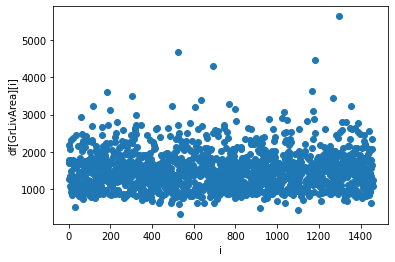

In [61]:
plt.scatter(range(0,len(df['GrLivArea'])), df['GrLivArea'])
plt.xlabel('i')
plt.ylabel('df[GrLivArea][i]')

Text(0, 0.5, 'df[GarageYrBlt][i]')

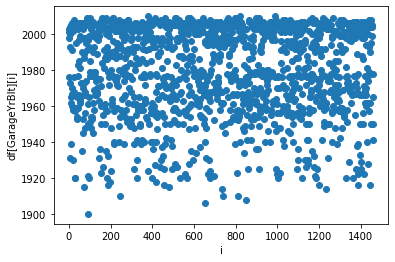

In [62]:
plt.scatter(range(0,len(df['GarageYrBlt'])), df['GarageYrBlt'])
plt.xlabel('i')
plt.ylabel('df[GarageYrBlt][i]')

In [18]:
def preprocess(dataframe):
    # MSSubClass: Identifies the type of dwelling involved in the sale. - kategorie
    dataframe['MSSubClass'] = LabelEncoder().fit_transform(dataframe['MSSubClass'].astype('str'))

    # MSZoning: Identifies the general zoning classification of the sale. - kategorie
    dataframe['MSZoning'] = LabelEncoder().fit_transform(dataframe['MSZoning'].astype('str'))

    # LotFrontage: Linear feet of street connected to property - zmienna liczbowa, skalujemy według rozkładu normalnego
    # NA oznacza 0
    dataframe['LotFrontage'] = dataframe['LotFrontage'].replace({np.nan: 0})
    dataframe['LotFrontage'] = StandardScaler().fit_transform(np.array(dataframe['LotFrontage']).reshape(-1, 1));

    # LotArea: Lot size in square feet - zmienna liczbowa, skalujemy według rozkładu normalnego
    dataframe['LotArea'] = StandardScaler().fit_transform(dataframe['LotArea'].values.reshape(-1, 1))

    # Street: Type of road access to property - kategoria
    dataframe['Street'] = LabelEncoder().fit_transform(dataframe['Street'].astype('str'))

    # Alley: Type of alley access to property - kategoria
    dataframe['Alley'] = LabelEncoder().fit_transform(dataframe['Alley'].astype('str'))

    # LotShape: General shape of property - kategoria, zmienna jakościowa
    lotShapeDict = {"Reg": 1, "IR1": 2, "IR2": 3, "IR3": 4}
    dataframe['LotShape'] = dataframe['LotShape'].replace(lotShapeDict)

    # LandContour: Flatness of the property - kategoria
    dataframe['LandContour'] = LabelEncoder().fit_transform(dataframe['LandContour'].astype('str'))

    # LotConfig: Lot configuration - kategoria
    dataframe['LotConfig'] = LabelEncoder().fit_transform(dataframe['LotConfig'].astype('str'))

    # LandSlope: Slope of property - kategoria
    dataframe['LandSlope'] = LabelEncoder().fit_transform(dataframe['LandContour'].astype('str'))

    # Neighborhood: Physical locations within Ames city limits - kategoria
    dataframe['Neighborhood'] = LabelEncoder().fit_transform(dataframe['Neighborhood'].astype('str'))

    # Condition1: Proximity to various conditions
    # Condition2: Proximity to various conditions (if more than one is present) - kategorie
    conditionDict = {"Artery": 1, "Feedr": 2, "Norm": 3,	"RRNn": 4, "RRAn": 5, "PosN": 6, "PosA": 7, "RRNe": 8, "RRAe": 9}
    dataframe['Condition1'] = dataframe['Condition1'].replace(conditionDict)
    dataframe['Condition2'] = dataframe['Condition2'].replace(conditionDict)

    # Utilities: Type of utilities available - kategoria, zmienna jakościowa - każda kolejna kategoria oznacza wyższy standard
    utilitiesDict = {"AllPub": 3, "NoSewr": 2, "NoSeWa": 1, "ELO": 0}
    dataframe['Utilities'] = dataframe['Utilities'].replace(utilitiesDict);

    # BldgType: Type of dwelling - kategoria
    dataframe['BldgType'] = LabelEncoder().fit_transform(dataframe['BldgType'].astype('str'))

    # HouseStyle: Style of dwelling - kategoria
    dataframe['HouseStyle'] = LabelEncoder().fit_transform(dataframe['HouseStyle'].astype('str'))

    # YearBuilt, YearRemodAdd, OverallCond, OverallQual: Zmienne liczbowe - uznaliśmy, że nie ma potrzeby ich przekształcać
    # zmienna dyskretna bez brakujących wartości, nia ma potrzeby przekształceń
    print(dataframe['GarageCars'].isna().sum())
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['GarageArea'].isna().sum())
    dataframe['GarageArea'] = StandardScaler().fit_transform(dataframe['GarageArea'].values.reshape(-1,1))
    # zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak garażu
    print(dataframe['GarageQual'].isna().sum())
    unq_vals = dataframe['GarageQual'].unique().astype('str')
    dataframe['GarageQual'] = dataframe['GarageQual'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
    # zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak garażu
    print(dataframe['GarageCond'].isna().sum())
    print(dataframe['GarageCond'].unique())
    dataframe['GarageCond'] = dataframe['GarageCond'].replace({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan: 0})
    # zmienna kategoryczna, zamiana kategorii na liczby
    print(dataframe['PavedDrive'].isna().sum())
    dataframe['PavedDrive'] = LabelEncoder().fit_transform(dataframe['PavedDrive'])
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['WoodDeckSF'].isna().sum())
    dataframe['WoodDeckSF'] = StandardScaler().fit_transform(dataframe['WoodDeckSF'].values.reshape(-1,1))
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['OpenPorchSF'].isna().sum())
    dataframe['OpenPorchSF'] = StandardScaler().fit_transform(dataframe['OpenPorchSF'].values.reshape(-1,1))
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['EnclosedPorch'].isna().sum())
    dataframe['EnclosedPorch'] = StandardScaler().fit_transform(dataframe['EnclosedPorch'].values.reshape(-1,1))
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['3SsnPorch'].isna().sum())
    dataframe['3SsnPorch'] = StandardScaler().fit_transform(dataframe['3SsnPorch'].values.reshape(-1,1))
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['ScreenPorch'].isna().sum())
    dataframe['ScreenPorch'] = StandardScaler().fit_transform(dataframe['ScreenPorch'].values.reshape(-1,1))
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['PoolArea'].isna().sum())
    dataframe['PoolArea'] = StandardScaler().fit_transform(dataframe['PoolArea'].values.reshape(-1,1))
    # zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak basenu
    print(dataframe['PoolQC'].isna().sum())
    print(dataframe['PoolQC'].unique())
    dataframe['PoolQC'] = dataframe['PoolQC'].replace({'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, np.nan: 0})
    # zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak ogrodzenia
    print(dataframe['Fence'].isna().sum())
    print(dataframe['Fence'].unique())
    dataframe['Fence'] = dataframe['Fence'].replace({'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, np.nan: 0})
    # zmienna kategoryczna, zamiana kategorii na liczby, nan oznacza brak któregokolwiek z wymienionych udogodnień
    print(dataframe['MiscFeature'].isna().sum())
    print(dataframe['MiscFeature'].unique())
    dataframe['MiscFeature'] = dataframe['MiscFeature'].replace({'Elev': 5, 'Gar2': 4, 'Othr': 3, 'Shed': 2, 'TenC': 1, np.nan: 0})
    # zmienna ciągła, skalujemy wg rozkładu normalnego
    print(dataframe['MiscVal'].isna().sum())
    dataframe['MiscVal'] = StandardScaler().fit_transform(dataframe['MiscVal'].values.reshape(-1,1))
    # zmienna typu data
    print(dataframe['MoSold'].isna().sum())
    # zmienna typu data
    print(dataframe['YrSold'].isna().sum())
    # zmienna kategoryczna, zamiana kategorii na liczby,
    print(dataframe['SaleType'].isna().sum())
    dataframe['SaleType'] = LabelEncoder().fit_transform(dataframe['SaleType'])
    # zmienna kategoryczna, zamiana kategorii na liczby,
    print(dataframe['SaleCondition'].isna().sum())
    dataframe['SaleCondition'] = LabelEncoder().fit_transform(dataframe['SaleCondition'])
    # objaśniana zmienna, bierzemy logarytm żeby z równą wagą traktować duże i małe wartości 
    print(dataframe['SalePrice'].isna().sum())
    dataframe['SalePrice'] = np.log(dataframe['SalePrice'])
    # kolumny 21 - 40

    dataframe20_40 = dataframe.iloc[:,20:40]  # będę pracował na kopii, potem ją wrzucę do głównego dataframe
    # 21 kolumna - RoofStyle

    col = dataframe20_40['RoofStyle']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy

    np_col = np.array(col)
    print(f'Nazwy unikatowych wartości: {np.unique(np_col)}')

    # zamiana string na int, zaczynajac od 0 i idąc alfabetycznie
    new_names = {'Flat': 0,
                'Gable': 1,
                'Gambrel': 2,
                'Hip': 3,
                'Mansard': 4,
                'Shed': 5}

    col_num = col.replace(new_names)
    print(f'Sposób zamiany kategorii {new_names}')

    dataframe20_40['RoofStyle'] = col_num
    # 22 kolumna - RoofMatl

    col = dataframe20_40['RoofMatl']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy

    np_col = np.array(col)
    print(f'Nazwy unikatowych wartości: {np.unique(np_col)}')

    # zamiana string na int, zaczynajac od 0 i idąc alfabetycznie
    new_names = {'ClyTile': 0,
                'CompShg': 1,
                'Membran': 2,
                'Metal': 3,
                'Roll': 4,
                'Tar&Grv': 5,
                'WdShake': 6,
                'WdShngl': 7}

    col_num = col.replace(new_names)
    print(f'Sposób zamiany kategorii {new_names}')

    dataframe20_40['RoofMatl'] = col_num
    # 23 kolumna - Exterior1st


    col = dataframe20_40['Exterior1st']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy

    np_col = np.array(col)
    print(f'Nazwy unikatowych wartości: {np.unique(np_col)}')

    # zamiana string na int, robię to LabelEncoderem ponieważ nie jest to zmienna jakościowa (cech nie da się uporządkować)
    col_num = LabelEncoder().fit_transform(col.astype('str'))

    dataframe20_40['Exterior1st'] = col_num
    # 24 kolumna - Exterior2nd

    col = dataframe20_40['Exterior2nd']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy

    np_col = np.array(col)
    print(f'Nazwy unikatowych wartości: {np.unique(np_col)}')

    # zamiana string na int, robię to LabelEncoderem ponieważ nie jest to zmienna jakościowa (cech nie da się uporządkować)
    col_num = LabelEncoder().fit_transform(col.astype('str'))

    dataframe20_40['Exterior2nd'] = col_num
    # 25 kolumna - MasVnrType: Masonry veneer type

    col = dataframe20_40['MasVnrType']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy
    if col.isnull().values.any():
        col = col.fillna('-1')

    np_col = np.array(col)
    print(f'Nazwy unikatowych wartości: {np.unique(np_col)}')

    # zamiana string na int, cech nie da się uporządkować ale robię Series.replace() ze względu na to, że chcę aby NaNy miały wartość -1
    col_names = {'-1': -1,
                'BrkCmn': 0,
                'BrkFace': 1,
                'CBlock': 2,
                'None': 3,
                'Stone': 4}

    col_num = col.replace(col_names)

    dataframe20_40['MasVnrType'] = col_num
    # 26 kolumna - MasVnrArea: Masonry veneer area in square feet

    col = dataframe20_40['MasVnrArea']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy
    if col.isnull().values.any():
        col = col.fillna(col.mean())

    # kolumna posiada ciągłe wartości liczbowe, więc przeskalowuje funkcją StandardScaler() z domyślnymi parametrami (przesunięcie o średnią próbki i podzielenie przez odchylenie standardowe)
    np_col = col.values
    np_col = StandardScaler().fit_transform(np_col.reshape([-1,1]))

    dataframe20_40['MasVnrArea'] = np_col
    # 27 kolumna - ExterQual

    col = dataframe20_40['ExterQual']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy

    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3,
                'Ex': 4}

    col_num = col.replace(new_names)

    dataframe20_40['ExterQual'] = col_num
    # 28 kolumna - ExterCond

    col = dataframe20_40['ExterCond']
    #print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy

    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3,
                'Ex': 4}

    col_num = col.replace(new_names)

    dataframe20_40['ExterCond'] = col_num
    # 29 kolumna - Foundation

    col = dataframe20_40['Foundation']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy

    # zamiana string na int, robię to LabelEncoderem ponieważ nie jest to zmienna jakościowa (cech nie da się uporządkować)
    col_num = LabelEncoder().fit_transform(col.astype('str'))


    dataframe20_40['Foundation'] = col_num
    # 30 kolumna - BsmtQual: Evaluates the height of the basement
    # zakladam ze null to brak piwnicy

    col = dataframe20_40['BsmtQual']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy
    col = col.fillna('NA')

    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'NA': 0,
                'Po': 1,
                'Fa': 2,
                'TA': 3,
                'Gd': 4,
                'Ex': 5}

    col_num = col.replace(new_names)

    dataframe20_40['BsmtQual'] = col_num
    # 31 kolumna - BsmtCond: Evaluates the general condition of the basement
    # zakladam ze null to brak piwnicy

    col = dataframe20_40['BsmtCond']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy
    col = col.fillna('NA')

    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'NA': 0,
                'Po': 1,
                'Fa': 2,
                'TA': 3,
                'Gd': 4,
                'Ex': 5}

    col_num = col.replace(new_names)

    dataframe20_40['BsmtCond'] = col_num
    # 32 kolumna - BsmtExposure: Refers to walkout or garden level walls
    # zakladam ze null to brak piwnicy

    col = dataframe20_40['BsmtExposure']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy
    col = col.fillna('NA')

    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'NA': 0,
                'No': 1,
                'Mn': 2,
                'Av': 3,
                'Gd': 4}

    col_num = col.replace(new_names)

    dataframe20_40['BsmtExposure'] = col_num
    # 33 kolumna - BsmtFinType1: Rating of basement finished area

    col = dataframe20_40['BsmtFinType1']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy
    col = col.fillna('NA')

    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'NA': 0,
                'Unf': 1,
                'LwQ': 2,
                'Rec': 3,
                'BLQ': 4,
                'ALQ': 5,
                'GLQ': 6}

    col_num = col.replace(new_names)

    dataframe20_40['BsmtFinType1'] = col_num
    # 34 kolumna - BsmtFinSF1: Type 1 finished square feet

    col = dataframe20_40['BsmtFinSF1']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy

    # kolumna posiada ciągłe wartości liczbowe, więc przeskalowuje funkcją StandardScaler() z domyślnymi parametrami (przesunięcie o średnią próbki i podzielenie przez odchylenie standardowe)
    np_col = col.values
    np_col = StandardScaler().fit_transform(np_col.reshape([-1,1]))

    dataframe20_40['BsmtFinSF1'] = np_col
    # 35 kolumna - BsmtFinType2: Rating of basement finished area (if multiple types)


    col = dataframe20_40['BsmtFinType2']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy
    col = col.fillna('NA')

    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'NA': 0,
                'Unf': 1,
                'LwQ': 2,
                'Rec': 3,
                'BLQ': 4,
                'ALQ': 5,
                'GLQ': 6}

    col_num = col.replace(new_names)

    dataframe20_40['BsmtFinType2'] = col_num
    # 36 kolumna - BsmtFinSF2: Type 2 finished square feet

    col = dataframe20_40['BsmtFinSF2']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy

    # kolumna posiada ciągłe wartości liczbowe, więc przeskalowuje funkcją StandardScaler() z domyślnymi parametrami (przesunięcie o średnią próbki i podzielenie przez odchylenie standardowe)
    np_col = col.values
    np_col = StandardScaler().fit_transform(np_col.reshape([-1,1]))

    dataframe20_40['BsmtFinSF2'] = np_col
    # 37 kolumna - BsmtUnfSF: Unfinished square feet of basement area

    col = dataframe20_40['BsmtUnfSF']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy

    # kolumna posiada ciągłe wartości liczbowe, więc przeskalowuje funkcją StandardScaler() z domyślnymi parametrami (przesunięcie o średnią próbki i podzielenie przez odchylenie standardowe)
    np_col = col.values
    np_col = StandardScaler().fit_transform(np_col.reshape([-1,1]))

    dataframe20_40['BsmtUnfSF'] = np_col
    # 38 kolumna - TotalBsmtSF: Total square feet of basement area

    col = dataframe20_40['TotalBsmtSF']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy

    # kolumna posiada ciągłe wartości liczbowe, więc przeskalowuje funkcją StandardScaler() z domyślnymi parametrami (przesunięcie o średnią próbki i podzielenie przez odchylenie standardowe)
    np_col = col.values
    np_col = StandardScaler().fit_transform(np_col.reshape([-1,1]))

    dataframe20_40['TotalBsmtSF'] = np_col
    # 39 kolumna - Heating: Type of heating

    col = dataframe20_40['Heating']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy

    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'Wall': 0,
                'Floor': 1,
                'GasA': 2,
                'GasW': 3,
                'Grav': 4,
                'OthW': 5,
                'Wall': 6}

    col_num = col.replace(new_names)

    dataframe20_40['Heating'] = col_num
    # 40 kolumna - HeatingQC: Heating quality and condition

    col = dataframe20_40['HeatingQC']
    print(f'Czy są NaNy: {col.isnull().values.any()}')  # sprawdzam czy są gdzieś w kolumnie NaNy

    # zmienna jakościowa, zamiana string na int w ten sposób, że wieksza liczba == lepiej
    new_names = {'Po': 0,
                'Fa': 1,
                'TA': 2,
                'Gd': 3,
                'Ex': 4}

    col_num = col.replace(new_names)

    dataframe20_40['HeatingQC'] = col_num
    dataframe.iloc[:,20:40] = dataframe20_40
    # kolumny 41-60
    dataframe2 = dataframe.iloc[:,40:59]

    # BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, TotRmsAbvGrd, Fireplaces - kolumny, z którymi nic nie robiłam, bo mają po kilka dyskretnych wartosci, wiec beda dzialac :)
    #GarageYrBlt - lata (1900 - 2010), trzeba się zastanowić jeszcze, co zrobić z tą kolumną 
    dataframe2["GarageYrBlt"] = dataframe2["GarageYrBlt"].fillna(np.mean(dataframe2["GarageYrBlt"]))

    #CentralAir - zmienna kategoryczna, dwie wartości Yes, No przerabiamy na 0,1
    dataframe2['CentralAir'] = LabelEncoder().fit_transform(dataframe['CentralAir'].astype('str'))

    #Electrical - zmienna kategoryczna (5 kategorii) -> zmienna dyskretna (0-4)
    dataframe2['Electrical'] = LabelEncoder().fit_transform(dataframe['Electrical'].astype('str'))

    #1stFlrSF - powierzchnia pierwszego pietra -> standaryzacja
    c3 = dataframe["1stFlrSF"].values 
    dataframe2["1stFlrSF"] = StandardScaler().fit_transform(c3.reshape(-1,1)) 

    #2ndflrSF - powierzchnia drugiego pietra -> standaryzacja
    c4 = dataframe["2ndFlrSF"].values     
    dataframe2["2ndFlrSF"] = StandardScaler().fit_transform(c4.reshape(-1,1)) 

    #LowQualFinSF - powierzchnia zlej jakosci -> standaryzacja
    c5 = dataframe["LowQualFinSF"].values      
    dataframe2["LowQualFinSF"] = StandardScaler().fit_transform(c5.reshape(-1,1)) 

    #GrLivAre - powierzchnia jakosci ponad norme -> standaryzacja
    c6 = dataframe["GrLivArea"].values   
    dataframe2["GrLivArea"] = StandardScaler().fit_transform(c6.reshape(-1,1)) 

    #KitchenQual - zmienna kategoryczna (5 kategorii) -> zmienna dyskretna (0-4)
    c11 = dataframe["KitchenQual"]
    new_names = {
        'Po' : 0,
        'Fa' : 1,
        'TA' : 2,
        'Gd' : 3,
        'Ex' : 4
    }
    dataframe2["KitchenQual"] = c11.replace(new_names)

    #Functional - zmienna jakościowa (8 kategorii w porządku od najgorszego (0) do najlepszego (7)) -> zmienna dyskretna (0-7)
    c13 = dataframe["Functional"]
    new_names1 = {
        'Sal' : 0,
        'Sev' : 1,
        'Maj2' : 2,
        'Maj1' : 3,
        'Mod' : 4,
        'Min2' : 5,
        'Min1' : 6,
        'Typ' : 7
    }
    dataframe2["Functional"] = c13.replace(new_names1)

    #FireplaceQu - NA - z opisu danych oznacza brak kominka, nadajemy temu kategorię 0
    #            - zmienna jakościowa (6 kategorii od najgorszej, czyli braku kominka(0) do najlepszej (5)) -> zmienna dyskretna (0-5)
    c15 = dataframe["FireplaceQu"]
    c15 = c15.fillna(0)
    new_names2 = {
        np.nan : 0,
        'Po' : 1,
        'Fa' : 2,
        'TA' : 3,
        'Gd' : 4,
        'Ex' : 5
    }
    dataframe2["FireplaceQu"] = c15.replace(new_names2)

    #GarageType - z opisu danych brak oznacza brak garażu -> nadajemy kategorię 0
    #           - zmienna kategoryczna  (7 kategorii) -> zmienna dyskretna (0-6)
    c16 = dataframe["GarageType"]
    new_names3 = {
        np.nan : 0,
        'nan': 0,
        'NA': 0,
        None: 0,
        '': 0,
        float('nan'): 0,
        'Detchd' : 1,
        'CarPort' : 2,
        'BuiltIn' : 3,
        'Basment' : 4,
        'Attchd' : 5,
        '2Types' : 6
    }
    dataframe2["GarageType"] = c16.replace(new_names3)

    #GarageFinish - z opisu danych NA oznacza brak garaż€ -> nadajemy kategorię 0
    #             - zmienna jakościowa (4 kategorie, od najgorszej (0), do najlepszej (3)) -> zmienna dyskretna (0-3)
    c18 = dataframe["GarageFinish"]
    new_names4 = {
        np.nan : 0,
        'Unf' : 1,
        'RFn' : 2,
        'Fin' : 3
    }
    dataframe2["GarageFinish"] = c18.replace(new_names4)


    dataframe.iloc[:, 40:60] = dataframe2

    return dataframe

In [19]:
df = preprocess(df)
df = df.values

X, y = df[:,:-1], df[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

0
0
81
81
['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
0
0
0
0
0
0
0
1453
[nan 'Ex' 'Fa' 'Gd']
1179
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
1406
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
0
0
0
0
0
0
Czy są NaNy: False
Nazwy unikatowych wartości: ['Flat' 'Gable' 'Gambrel' 'Hip' 'Mansard' 'Shed']
Sposób zamiany kategorii {'Flat': 0, 'Gable': 1, 'Gambrel': 2, 'Hip': 3, 'Mansard': 4, 'Shed': 5}
Czy są NaNy: False
Nazwy unikatowych wartości: ['ClyTile' 'CompShg' 'Membran' 'Metal' 'Roll' 'Tar&Grv' 'WdShake'
 'WdShngl']
Sposób zamiany kategorii {'ClyTile': 0, 'CompShg': 1, 'Membran': 2, 'Metal': 3, 'Roll': 4, 'Tar&Grv': 5, 'WdShake': 6, 'WdShngl': 7}
Czy są NaNy: False
Nazwy unikatowych wartości: ['AsbShng' 'AsphShn' 'BrkComm' 'BrkFace' 'CBlock' 'CemntBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Plywood' 'Stone' 'Stucco' 'VinylSd' 'Wd Sdng'
 'WdShing']
Czy są NaNy: False
Nazwy unikatowych wartości: ['AsbShng' 'AsphShn' 'Brk Cmn' 'BrkFace' 'CBlock' 'CmentBd' 'HdBoard'
 'ImStucc' 'MetalSd' 'Other' 'Plywood' 'Stone' 'Stucco' 'Vin

In [ ]:
# test_df = pd.read_csv("/content/WTUM_11_2022/test.csv", header=0)
# print(test_df)
# test_df = df.iloc[:,1:]
# test_df = preprocess(test_df)
# test_df = test_df.values
# X_test = test_df[:,:-1]
# y_test = test_df[:,-1]

In [20]:
param_grid = {'n_estimators': [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]}
random_forest1_clf = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=-1)
random_forest1_clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]})

In [21]:
print(random_forest1_clf.best_params_)
print(random_forest1_clf.score(X_test, y_test))

{'n_estimators': 1000}
0.854239784196487


In [22]:
param_grid = {'min_samples_split': range(2,20,1)}
random_forest2_clf = GridSearchCV(RandomForestRegressor(n_estimators = 1000), param_grid, n_jobs=-1)
random_forest2_clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=1000), n_jobs=-1,
             param_grid={'min_samples_split': range(2, 20)})

In [23]:
print(random_forest2_clf.best_params_)
print(random_forest2_clf.score(X_test, y_test))

{'min_samples_split': 2}
0.8546500039877596


In [7]:
param_grid = {'n_estimators': range(10,1010,50), 'min_samples_split': range(2,20,1)}
random_forest_clf = GridSearchCV(RandomForestRegressor(), param_grid, n_jobs=-1)
random_forest_clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_split': range(2, 20),
                         'n_estimators': range(10, 1010, 50)})

In [9]:
print(random_forest_clf.best_params_)
print(random_forest_clf.score(X_test, y_test))

{'min_samples_split': 7, 'n_estimators': 110}
0.8714560098412236


In [26]:
param_grid = {'n_estimators': [10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'base_estimator': [None, LinearRegression(), BayesianRidge(), ARDRegression(), linear_model.Ridge()]}
ada_boost_clf = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1)
ada_boost_clf.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [36]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_tree = GridSearchCV(AdaBoostRegressor(), param_grid, n_jobs=-1)
ada_boost_tree.fit(X_train, y_train)

print(ada_boost_tree.best_params_)
print(ada_boost_tree.score(X_test, y_test))

{'n_estimators': 800}
0.7867486829942121


In [35]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_lr = GridSearchCV(AdaBoostRegressor(base_estimator = LinearRegression()), param_grid, n_jobs=-1)
ada_boost_lr.fit(X_train, y_train)

print(ada_boost_lr.best_params_)
print(ada_boost_lr.score(X_test, y_test))

{'n_estimators': 10}
0.6327129119388744


In [34]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_br = GridSearchCV(AdaBoostRegressor(base_estimator = BayesianRidge()), param_grid, n_jobs=-1)
ada_boost_br.fit(X_train, y_train)

print(ada_boost_br.best_params_)
print(ada_boost_br.score(X_test, y_test))

{'n_estimators': 460}
0.6617156479334503


In [37]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_ard = GridSearchCV(AdaBoostRegressor(base_estimator = ARDRegression()), param_grid, n_jobs=-1)
ada_boost_ard.fit(X_train, y_train)

print(ada_boost_ard.best_params_)
print(ada_boost_ard.score(X_test, y_test))

{'n_estimators': 10}
0.6735834622159094


In [38]:
param_grid = {'n_estimators': range(10,1010,10)}
ada_boost_ridge = GridSearchCV(AdaBoostRegressor(base_estimator = linear_model.Ridge()), param_grid, n_jobs=-1)
ada_boost_ridge.fit(X_train, y_train)

print(ada_boost_ridge.best_params_)
print(ada_boost_ridge.score(X_test, y_test))

{'n_estimators': 10}
0.6529092580935021


In [ ]:
bagging_clf = GridSearchCV(BaggingRegressor(), param_grid, n_jobs=-1)
bagging_clf.fit(X_train, y_train)

GridSearchCV(estimator=BaggingRegressor(), n_jobs=-1,
             param_grid={'n_estimators': [10, 100, 200, 300, 400, 500, 600, 700,
                                          800, 900, 1000]})

In [ ]:
param_grid = {'n_iter': [100, 200, 250, 300, 350, 400, 500]}
bayes_reg = GridSearchCV(BayesianRidge(), param_grid, n_jobs=-1)
bayes_reg.fit(X_train, y_train)

GridSearchCV(estimator=BayesianRidge(), n_jobs=-1,
             param_grid={'n_iter': [100, 200, 250, 300, 350, 400, 500]})

In [ ]:
param_grid = {'n_iter': [100, 200, 250, 300, 350, 400, 500]}
ard_reg = GridSearchCV(ARDRegression(), param_grid, n_jobs=-1)
ard_reg.fit(X_train, y_train)

GridSearchCV(estimator=ARDRegression(), n_jobs=-1,
             param_grid={'n_iter': [100, 200, 250, 300, 350, 400, 500]})

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# checking acc
print(random_forest_clf.score(X_test, y_test)) # O
print(ada_boost_clf.score(X_test, y_test)) # S
print(bagging_clf.score(X_test, y_test)) # P
print(bayes_reg.score(X_test, y_test)) # J
print(ard_reg.score(X_test, y_test)) # J
print(lin_reg.score(X_test, y_test)) # Done

0.87421452609469
0.8062751809422284
0.8766245382230969
0.8324503681631086
0.8059501255037319
0.807447107318553
-0.027716970109248562


In [25]:
#moze jeszcze to by bylo warto 
from sklearn import linear_model
reg = linear_model.Ridge()